### GEOL 593P – Exercise 9

Goal-A: The principle of heat conduction

Goal-B: Cooling of the Oceanic Lithosphere

Goal-C: Ocean Floor Topography

### Fourier’s Law of Heat Conduction

<img src="fig/f41_heat_transfer.png" width="300" align="left">

The heat flux $q$, or the flow of heat per unit area and per unit time, at a point in a medium is directly proportional to the temperature gradient at the point. In one dimension, Fourier’s law takes the form

$$q = -k\frac{dT}{dy}$$

where $k$ is the coefficient of $thermal\,conductivity$ and $y$ is the coordinate in the direction of the temperature variation. 

### Exercise 1: measuring the thermal conductivity of a rock sample 
_**(Problem 4.1 in Turcotte & Schubert, Ch. 4)**_

<img src="fig/fig43_thermal_conductivity.png" width="600" align="left">

The rock sample of thermal conductivity $k_r$ is placed between material – brass, for example – of thermal conductivity $k_b$. Thermocouples measure the temperatures of the hot and cold ends of the metal, $T_H$ and $T_c$, respectively, and the temperatures at the surfaces of the metal adjoining the rock section, $T_1$ and $T_2$. The contact between the rock and metal (air perhaps) involves an unknown thermal resistance to the flow of heat. Since the same heat must be conducted through the rock and metal in steady state, Fourier’s law (4–1) can be used to determine $k_r$ in terms of the measurable quantities $T_H,\, T_c,\, T_1,\, T_2,\, d,\, l$ and the conductivity $k_b$.

Read Problem 4.1 and answer (1) how to measure the $k_r$; (2) what are the advantage and disadvantage of this methods. 

### One-Dimensional, Time-Dependent Heat Conduction
_**(4.13 in Turcotte & Schubert, Ch. 4)**_

The specific heat c of the medium is the energy required to raise the temperature of a unit mass of material by one degree. Thus, an element of the slab of thickness δy and unit cross-sectional area requires an energy flow per unit time given by

$$\rho c \frac{\partial T}{\partial t} \delta y$$

to maintain a temperature change at the rate $\partial T / \partial t$ ($\rho \delta y$ is the slab mass per unit cross-sectional area and $\rho c \delta y$ is the slab’s heat capacity per unit cross-sectional area). Thus we can equate the right side of Equation 

$$q = -k\frac{dT}{dy}$$

with

$$-\delta y \, \rho c \frac{\partial T}{\partial t} $$,

since a net heat flow out of the slab leads to a decrease in slab temperature

$$ \rho c \frac{\partial T}{\partial t} = k\frac{d^2T}{dy^2}$$

We can rewrite Equation in the form

$$ \frac{\partial T}{\partial t} = \kappa \frac{d^2T}{dy^2}$$

where $\kappa$, the thermal diffusivity, is
$$ \kappa = \frac{k}{\rho c}$$

Note that $\kappa$ has units of $length^2/time$ such as square meters per second.

### Instantaneous Heating or Cooling of a Semi-Infinite Half-Space
_**(4.15 in Turcotte & Schubert, Ch. 4)**_

<img src="fig/fig420_heating_half_space.png">


We now obtain the solution to Equation $ \frac{\partial T}{\partial t} = \kappa \frac{d^2T}{dy^2}$ in a semi-infinite half- space defined by

$$T=T_1\, at\, t=0,\,y>0$$
$$T=T_0\, at\, y=0,\,t>0$$
$$T\rightarrow T_1\, at\, y \rightarrow \infty,\,t>0$$


The solution for the temperature as a function of time $t$ and distance $y$ is

$$\frac{T-T_1}{T_0-T_1} = erfc \frac{y}{2\sqrt{\kappa t}} $$

where $erfc(x)$ is the complementary error function. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf, erfinv

In [2]:
# Thermal diffusivity (1 mm^2*s^-1 = 1e-6 m^2*s^-1)
kappa = 1e-6
# Surface of the ocean floor (°c)
T0 = 0
# Surface of the ocean floor (°c)
T1 = 1300
# time in Myr
t_Myr = 2

## calculation
t = 3600 * 24 * 365 * t_Myr * 1e6
# y profile
y = np.linspace(0,200e3,101)
# temperature
T = erf(y / 2 / np.sqrt(kappa * t)) * (T1 - T0) + T0

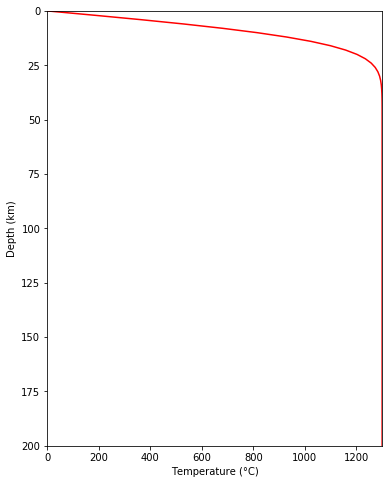

In [3]:
fig1 = plt.figure(1, figsize=(6,8))
plt.plot(T, y / 1e3, 'r-')
plt.ylim([y[-1]/1e3, y[0]/1e3])
plt.xlim([T0, T1])
plt.xlabel("Temperature (°C)")
plt.ylabel("Depth (km)")
plt.show()

### Temperature Profile of different time

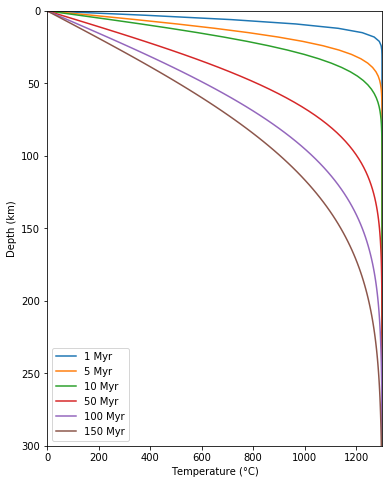

In [4]:
# time series
TimeSeries = np.array([1, 5, 10, 50, 100, 150])

fig2 = plt.figure(2, figsize=(6,8))

for t_Myr in TimeSeries:

    ## calculation
    t = 3600 * 24 * 365 * t_Myr * 1e6
    # y profile
    y = np.linspace(0,300e3,101)
    # temperature
    T = erf(y / 2 / np.sqrt(kappa * t)) * (T1 - T0) + T0


    plt.plot(T, y / 1e3, '-', 
             label="{} Myr".format(t_Myr))
    plt.ylim([y[-1]/1e3, y[0]/1e3])
    plt.xlim([T0, T1])
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Depth (km)")
    plt.legend()
    
plt.show()

### Isotherm of oceanic lithosphere

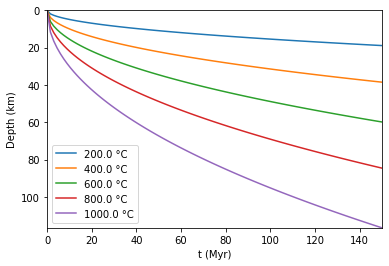

In [5]:
Temp = np.linspace(200,1000,5)

## calculation
t_Myr = np.linspace(0,150,101)
for T in Temp:
    # time in seconds
    t = 3600 * 24 * 365.25 * t_Myr * 1e6
    # y profile
    y = erfinv((T - T0)/(T1 - T0)) * 2 * np.sqrt(kappa * t )
    plt.plot(t_Myr, y / 1e3, '-', 
             label="{} °C".format(T))
    plt.ylim([y[-1]/1e3, y[0]/1e3])
    plt.xlim([t_Myr[0], t_Myr[-1]])
    plt.xlabel("t (Myr)")
    plt.ylabel("Depth (km)")
    plt.legend()
    
plt.show()

### Exercise 2: The thickness of the lithosphere according to the Half-space cooling model

<img src="fig/fig423_columns_mantle.png">

Assume the bottom of the lithosphere is 1200 °C, and the half-spreading rate of the plate is 50 mm/yr

Calculate the thickness of the lithosphere:

__*You can explore other parameter values to see:*__

(a) What happens if the bottom of the lithosphere has a higher temperature?

(b) What happens if the spreading rate of the plate is higher?

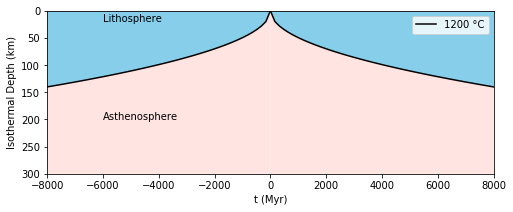

In [6]:
#### Change the parameter here ####
# isothermal temperature (°C)
T_lith = 1200
# Half spreading rate (mm/yr)
u0 = 80 

#### calculation ####
# velocity in m/s
u = u0 * 1e-3 / (365.25 * 24 * 3600)
# time in Myr
t_Myr = np.linspace(0,200,101)
# time in seconds
t = 3600 * 24 * 365.25 * t_Myr * 1e6
# y profile
y = erfinv((T_lith - T0 - 1)/(T1 - T0)) * 2 * np.sqrt(kappa * t )

#### plot ####
fig4 = plt.figure(4, figsize=(8,3))
# plot isothermal profile
plt.plot(t * u / 1e3, y / 1e3, 'k-')
plt.plot(-t * u / 1e3, y / 1e3, 'k-', 
         label="{} °C".format(T_lith))
# fill the area between lines
ax = plt.gca()
ax.fill_between(t * u / 1e3, 0, y / 1e3, facecolor='skyblue')
ax.fill_between(-t * u / 1e3, 0, y / 1e3, facecolor='skyblue')
ax.fill_between(t * u / 1e3, 300, y / 1e3, facecolor='mistyrose')
ax.fill_between(-t * u / 1e3, 300, y / 1e3, facecolor='mistyrose')
# label the area
ax.text(-6000, 200, 'Asthenosphere')
ax.text(-6000, 20, 'Lithosphere')
# set axis
plt.ylim([300, 0])
plt.xlim([-8000, 8000])
plt.xlabel("t (Myr)")
plt.ylabel("Isothermal Depth (km)")
plt.legend()
    
plt.show()

### Exercise 3: Calculate the 2D temperature profile of the oceanic mantle

__*Answer:*__

How does this result compare to the results from the COMSOL models (Ex 05 Week 8 - Oct. 16th)?

In [7]:
#### Change the parameter here ####
# Half spreading rate (mm/yr)
u0 = 50

#### calculation ####
# time in Myr
t_Myr = np.linspace(0,200,101)
# time in seconds
t = 3600 * 24 * 365.25 * t_Myr * 1e6
# Half spreading rate in m/s
u = u0 * 1e-3 / (365.25 * 24 * 3600)
# calculate the x distance
x = t * u
# define depth array
y = np.linspace(0,300e3,101)
# mesh grid
X, Y = np.meshgrid(t, y)
# calculate the 2D profile of temperature
T_2d = erf(Y / 2 / np.sqrt(kappa * X + 1e-6)) * (T1 - T0) + T0

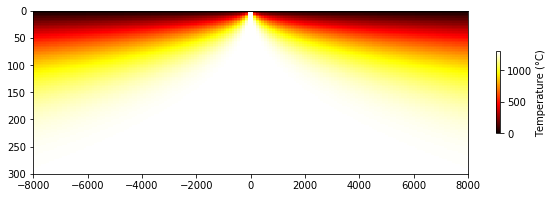

In [8]:
#### plot ####
fig5 = plt.figure(5, figsize=(10,3))
# temperature profile
T_prf = np.hstack([np.fliplr(T_2d), T_2d])
# plot Temperature 
plt.imshow(T_prf, extent=[-x.max()  / 1e3, x.max()  / 1e3, y.max() / 1e3, y.min() / 1e3],
           cmap="hot")

# set axis
ax = plt.gca()
ax.set_aspect(20)
plt.ylim([300, 0])
plt.xlim([-8000, 8000])

# add a colorbar
cbar = plt.colorbar(shrink=0.5)
cbar.ax.set_ylabel('Temperature (°C)', rotation=90)
plt.show()

### Thermal Expansion and density structure

$$ \rho - \rho_{m} = \rho_{m} \alpha_{\nu} (T_{1} - T) $$

Upon substitution of the temperature profile

Assuming:

$ \rho_{m} = 3300\,kg\, m^{-3}$

$ \alpha_{\nu} = 3 \times 10^{-5}\,K^{-1}$

$ T_{1} = 1300\,°C$

In [9]:
# mantle density
rhom = 3300
# sea water density
rhow = 1000
# thermal expansion coeffecient
alpha = 3e-5
# mantle temperature
T1 = 1300
# surface temperature
T0 = 0

# calculate the dendity profile
rho = rhom * alpha * (T1 - T_prf) + rhom

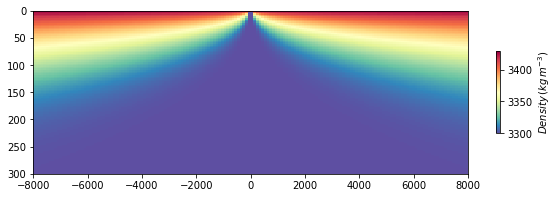

In [10]:
#### plot ####
fig6 = plt.figure(6, figsize=(10,3))
# plot Temperature 
plt.imshow(rho, extent=[-x.max()  / 1e3, x.max()  / 1e3, y.max() / 1e3, y.min() / 1e3],
           cmap="Spectral_r")

# set axis
ax = plt.gca()
ax.set_aspect(20)
plt.ylim([300, 0])
plt.xlim([-8000, 8000])

# add a colorbar
cbar = plt.colorbar(shrink=0.5)
cbar.ax.set_ylabel(r'$Density\,(kg\,m^{-3})$', rotation=90)
plt.show()

### Isostasy


Isostasy Demonstration by UNAVCO

https://youtu.be/_UQlxtpT8xY

### Models of isostatic compensation

<img src="fig/fig518_isostatic_compensation.png" width="600">

https://en.wikipedia.org/wiki/Isostasy

### Exercise 4: Calculate the mass of the mantle columes shown in the figure above

hint: use np.sum(rho, axis=0) to sum the mass

use plt.plot() to plot


### Ocean Floor Topography
_**(4.23 in Turcotte & Schubert, Ch. 4)**_


<img src="fig/fig444_ocean_topo.png">

The principle of isostasy states that any vertical column of material has the same mass per unit area between the surface and some depth of com- pensation. This is equivalent to the assumption that the lithostatic pressure at some depth is the same over a large horizontal area. However, as shown in the plot you have made before, columns of mantle material at different ages do not contain the same mass per unit area. The older column contains more dense, cold lithosphere than the younger one; the extra weight of the older lithosphere causes it to subside. Mantle material below the lithosphere flows away to accommodate the subsidence, and the ocean fills in the hole created at the surface. Figure 4–44 shows the oceanic lithosphere with the overlying ocean increasing in depth with distance from the ridge. The two columns of ages t1 and t2 now have the same mass per unit area because the older column contains more water to offset the added weight of dense lithospheric rock.

$$w = \frac{2 \rho_m \alpha_v(T_1-T_0)}{\rho_m-\rho_w}(\frac{\kappa x}{\pi u_0})^{1/2}$$

Equation above predicts that the depth of the ocean increases with the square root of the distance from the ridge or the square root of the age of the ocean floor.


In [11]:
# calculate the bathymetry
w = 2*rhom*alpha*(T1-T0) / (rhom-rhow) * np.sqrt(kappa*x/np.pi/u)

### Exercise 5: Compared the bathymetry profiles from the model and data

1. Download the bathymetry profiles from GeoMapApp

<img src="fig/f1_getprofile.png">

2. Save the profile data as text, read the data with "np.loadtxt()"

3. Plot the data over the results calculated by the equation above

_*Answer:*_

1). How different are the bathymetry profiles of the ocean with a fast, intermediant, and slow spreading MOR?

2). If the model can fit the data?

3). At which part of the profile, the model can fit the data better? Why?

In [12]:
# read profile
bath_prf = np.loadtxt("bath_prf.txt", skiprows=2)

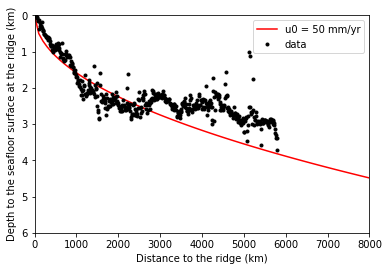

In [13]:
# plot the bathymetry from the model
plt.plot(x/1e3, w/1e3, 'r-', label="u0 = {} mm/yr".format(u0))
# plot the bathymetry from the data
plt.plot(bath_prf[:,2], -bath_prf[:,3]/1e3 + bath_prf[0,3]/1e3, 'k.', label="data".format(u0))
# set axis
plt.ylim([6, 0])
plt.xlim([0, 8000])
plt.xlabel('Distance to the ridge (km)')
plt.ylabel('Depth to the seafloor surface at the ridge (km)')
plt.legend()
plt.show()